In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Implement CNN for cifar10 dataset, utilize data augmentation for input images and use Pooling Layer.

In [ ]:
help(tf.keras.preprocessing.image.ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

Import Data

In [ ]:
from tensorflow.keras import utils

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
y_train = utils.to_categorical(train_labels, dtype ="uint8")
y_test = utils.to_categorical(test_labels, dtype ="uint8")

Setup data augmentation based on zooming into image and flipping image horizontally using keras image datagen library

In [ ]:
# resize with data generator
train_datagen_with_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True)
train_datagen_with_no_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255)

In [ ]:
train_datagen_with_transforms.fit(train_images)
train_datagen_with_no_transforms.fit(train_images)
val_datagen.fit(test_images)


In [ ]:
train_generator = train_datagen_with_no_transforms.flow(train_images,
    y_train,
    batch_size=32,
)
train_generator_with_data_augmentation = train_datagen_with_transforms.flow(train_images,
    y_train,
    batch_size=32,
)
validation_generator = val_datagen.flow(test_images,
    y_test,
    batch_size=32,
)

In [ ]:
sample_data = next(validation_generator)

In [ ]:
sample_data[0].shape

(32, 32, 32, 3)

In [ ]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [ ]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
print(len(train_generator),len(train_generator_with_data_augmentation),len(validation_generator))

1563 1563 313


In [ ]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator)/32, 
                    epochs=15, validation_data=validation_generator,validation_steps=len(validation_generator)/32)

Epoch 1/15
48/48 [==============================] - 1s 12ms/step - loss: 2.2152 - accuracy: 0.1939 - val_loss: 2.0535 - val_accuracy: 0.2562
Epoch 2/15
48/48 [==============================] - 0s 9ms/step - loss: 1.9209 - accuracy: 0.2934 - val_loss: 1.8404 - val_accuracy: 0.3063
Epoch 3/15
48/48 [==============================] - 0s 9ms/step - loss: 1.8302 - accuracy: 0.3514 - val_loss: 1.7793 - val_accuracy: 0.3844
Epoch 4/15
48/48 [==============================] - 0s 9ms/step - loss: 1.7620 - accuracy: 0.3629 - val_loss: 1.7594 - val_accuracy: 0.3688
Epoch 5/15
48/48 [==============================] - 0s 9ms/step - loss: 1.7189 - accuracy: 0.3661 - val_loss: 1.6769 - val_accuracy: 0.4437
Epoch 6/15
48/48 [==============================] - 0s 9ms/step - loss: 1.6300 - accuracy: 0.4152 - val_loss: 1.5509 - val_accuracy: 0.3875
Epoch 7/15
48/48 [==============================] - 0s 9ms/step - loss: 1.5625 - accuracy: 0.4477 - val_loss: 1.5306 - val_accuracy: 0.4250
Epoch 8/15
48/48 [=

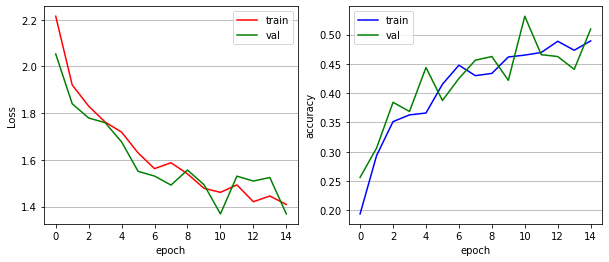

In [ ]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_no_dropout")

Simple CNN gives us accuracy close to 50%

CNN using Data augmentation Using Data augmentation

In [ ]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [ ]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator_with_data_augmentation, steps_per_epoch=len(train_generator_with_data_augmentation)/32, 
                    epochs=15, validation_data=validation_generator,validation_steps=len(validation_generator)/32)

Epoch 1/15
48/48 [==============================] - 2s 28ms/step - loss: 2.1796 - accuracy: 0.1862 - val_loss: 1.9795 - val_accuracy: 0.3250
Epoch 2/15
48/48 [==============================] - 1s 24ms/step - loss: 1.9108 - accuracy: 0.3036 - val_loss: 1.8510 - val_accuracy: 0.3812
Epoch 3/15
48/48 [==============================] - 1s 24ms/step - loss: 1.7700 - accuracy: 0.3699 - val_loss: 1.6969 - val_accuracy: 0.4187
Epoch 4/15
48/48 [==============================] - 1s 24ms/step - loss: 1.7512 - accuracy: 0.3724 - val_loss: 1.5513 - val_accuracy: 0.4531
Epoch 5/15
48/48 [==============================] - 1s 24ms/step - loss: 1.6694 - accuracy: 0.3903 - val_loss: 1.6444 - val_accuracy: 0.3750
Epoch 6/15
48/48 [==============================] - 1s 24ms/step - loss: 1.5746 - accuracy: 0.4267 - val_loss: 1.4557 - val_accuracy: 0.4781
Epoch 7/15
48/48 [==============================] - 1s 24ms/step - loss: 1.5796 - accuracy: 0.4369 - val_loss: 1.4517 - val_accuracy: 0.4844
Epoch 8/15
48

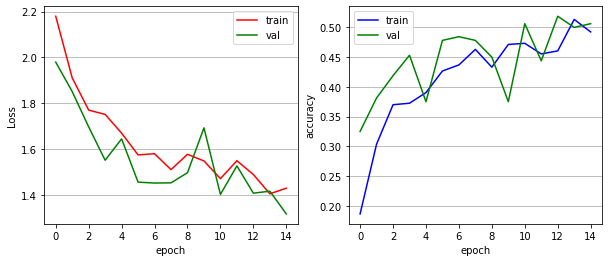

In [ ]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_data_augmentation")

Using Augmented data we were able to get more consistent accuracy values and the accuracies of the model increased faster near the beginning

With max pooling

In [ ]:
model2 =models.Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10))

In [ ]:
model2.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator)/32, 
                    epochs=15, validation_data=validation_generator,validation_steps=len(validation_generator)/32)

Epoch 1/15
48/48 [==============================] - 0s 10ms/step - loss: 1.2528 - accuracy: 0.5612 - val_loss: 1.3029 - val_accuracy: 0.5375
Epoch 2/15
48/48 [==============================] - 0s 9ms/step - loss: 1.2655 - accuracy: 0.5453 - val_loss: 1.4031 - val_accuracy: 0.5031
Epoch 3/15
48/48 [==============================] - 0s 9ms/step - loss: 1.2079 - accuracy: 0.5606 - val_loss: 1.3234 - val_accuracy: 0.5156
Epoch 4/15
48/48 [==============================] - 0s 9ms/step - loss: 1.2703 - accuracy: 0.5529 - val_loss: 1.3719 - val_accuracy: 0.5000
Epoch 5/15
48/48 [==============================] - 0s 9ms/step - loss: 1.1864 - accuracy: 0.5772 - val_loss: 1.1972 - val_accuracy: 0.5906
Epoch 6/15
48/48 [==============================] - 0s 9ms/step - loss: 1.1506 - accuracy: 0.5944 - val_loss: 1.2731 - val_accuracy: 0.5375
Epoch 7/15
48/48 [==============================] - 0s 9ms/step - loss: 1.1118 - accuracy: 0.6027 - val_loss: 1.2102 - val_accuracy: 0.5688
Epoch 8/15
48/48 [=

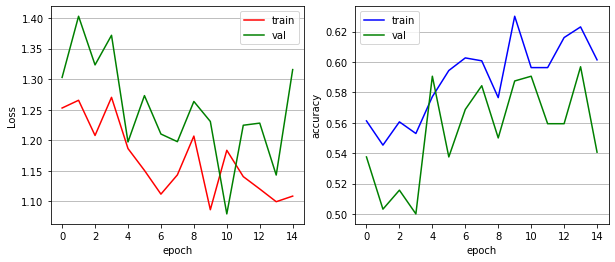

In [ ]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_with0_dropout_maxpool")

With only max pooling we get higher accuracy overall but validation loss is always higher and val accuracy is almost always 0.02 points below training accuracy. We can combine both data augmentation and pooling which can bring them both closer.

Max Pooling and data aug

In [ ]:
model2 =models.Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10))

In [ ]:
model2.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator_with_data_augmentation, steps_per_epoch=len(train_generator_with_data_augmentation)/32, 
                    epochs=15, validation_data=validation_generator,validation_steps=len(validation_generator)/32)

Epoch 1/15
48/48 [==============================] - 1s 25ms/step - loss: 1.4087 - accuracy: 0.5115 - val_loss: 1.4568 - val_accuracy: 0.4750
Epoch 2/15
48/48 [==============================] - 1s 24ms/step - loss: 1.4601 - accuracy: 0.4898 - val_loss: 1.4557 - val_accuracy: 0.4688
Epoch 3/15
48/48 [==============================] - 1s 24ms/step - loss: 1.4643 - accuracy: 0.4770 - val_loss: 1.4435 - val_accuracy: 0.4719
Epoch 4/15
48/48 [==============================] - 1s 24ms/step - loss: 1.4228 - accuracy: 0.4929 - val_loss: 1.3551 - val_accuracy: 0.5125
Epoch 5/15
48/48 [==============================] - 1s 24ms/step - loss: 1.3847 - accuracy: 0.4968 - val_loss: 1.4326 - val_accuracy: 0.4812
Epoch 6/15
48/48 [==============================] - 1s 24ms/step - loss: 1.3837 - accuracy: 0.5089 - val_loss: 1.4221 - val_accuracy: 0.4688
Epoch 7/15
48/48 [==============================] - 1s 24ms/step - loss: 1.3720 - accuracy: 0.5096 - val_loss: 1.2877 - val_accuracy: 0.5531
Epoch 8/15
48

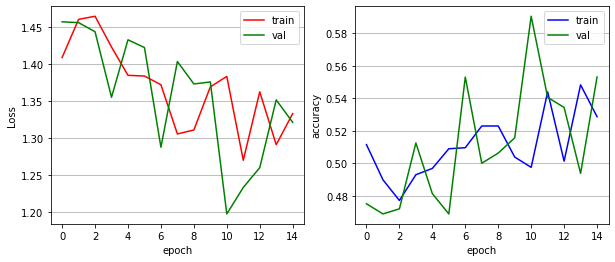

In [ ]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_with0_maxpool_dropout_augmentation")

Combining Max pooling layers and augmented data gave us the best result where we reached a highest of 55% accuracy on given dataset.<br> We can conclude that utilizing max pooling and data augmentation improved the effectiveness of our model.

Thus, we successfully implemented a CNN for modelling the cifar10 dataset. We can see that in all the models the accuracy and loss values jump erratically which could be a result of small batch size, Additionally as loss continues to decrease we can also increase number of epochs.